# Package

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import keras
import shutil
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

Mounted at /content/drive


# Create Dataset

In [ ]:
path = '/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset'
norm = '/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset/Normal cases'
beng = '/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset/Bengin cases'
mali = '/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset/Malignant cases'

In [ ]:
print('total normal images:', len(os.listdir(norm)))
print('total begin images:', len(os.listdir(beng)))
print('total malignant images:', len(os.listdir(mali)))

total normal images: 416
total begin images: 120
total malignant images: 561


In [ ]:
train_dir='/content/drive/MyDrive/lung_cancer_dataset/train'
print(os.listdir(train_dir))
valid_dir='/content/drive/MyDrive/lung_cancer_dataset/validation'
print(os.listdir(valid_dir))
test_dir='/content/drive/MyDrive/lung_cancer_dataset/test'
print(os.listdir(test_dir))

['malignant', 'normal', 'begin']
['begin', 'malignant', 'normal']
['malignant', 'begin', 'normal']


In [ ]:
train_subfolders=[f'{train_dir}/{folder}' for folder in os.listdir(train_dir)]
[print(subfolder) for subfolder in train_subfolders]

test_subfolders=[f'{test_dir}/{folder}' for folder in os.listdir(test_dir)]
print('\n')
[print(subfolder) for subfolder in test_subfolders];

valid_subfolders=[f'{valid_dir}/{folder}' for folder in os.listdir(valid_dir)]
print('\n')
[print(subfolder) for subfolder in valid_subfolders]

/content/drive/MyDrive/lung_cancer_dataset/train/malignant
/content/drive/MyDrive/lung_cancer_dataset/train/normal
/content/drive/MyDrive/lung_cancer_dataset/train/begin


/content/drive/MyDrive/lung_cancer_dataset/test/malignant
/content/drive/MyDrive/lung_cancer_dataset/test/begin
/content/drive/MyDrive/lung_cancer_dataset/test/normal


/content/drive/MyDrive/lung_cancer_dataset/validation/begin
/content/drive/MyDrive/lung_cancer_dataset/validation/malignant
/content/drive/MyDrive/lung_cancer_dataset/validation/normal


[None, None, None]

In [ ]:
#70%train 20%test 10%valid for normal
orig_path=norm
orig_files=os.listdir(orig_path)
training=orig_files[0:292]
for file in training:
    shutil.copy2(f'/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset/Normal cases/{file}','/content/drive/MyDrive/566/final/lung_cancer_dataset/train/normal')
validation=orig_files[292:333]
for file in validation:
    shutil.copy2(f'/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset/Normal cases/{file}','/content/drive/MyDrive/566/final/lung_cancer_dataset/test/normal')
testing=orig_files[333:]
for file in testing:
    shutil.copy2(f'/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset/Normal cases/{file}','/content/drive/MyDrive/566/final/lung_cancer_dataset/validation/normal')   

print('training: ', len(training))
print('validation: ',len(validation))
print('testing: ',len(testing))

training:  292
validation:  41
testing:  83


In [ ]:
#70%train 20%test 10%valid for begin
orig_path=beng
orig_files=os.listdir(orig_path)
training=orig_files[0:84]
for file in training:
    shutil.copy2(f'/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset/Bengin cases/{file}','/content/drive/MyDrive/566/final/lung_cancer_dataset/train/begin')
validation=orig_files[84:109]
for file in validation:
    shutil.copy2(f'/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset/Bengin cases/{file}','/content/drive/MyDrive/566/final/lung_cancer_dataset/test/begin')
testing=orig_files[109:]
for file in testing:
    shutil.copy2(f'/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset/Bengin cases/{file}','/content/drive/MyDrive/566/final/lung_cancer_dataset/validation/begin')   

print('training: ', len(training))
print('validation: ',len(validation))
print('testing: ',len(testing))

training:  84
validation:  25
testing:  11


In [ ]:
#70%train 20%test 10%valid for malignant
#cite: https://colab.research.google.com/drive/1eCeHFBsbuWxM1Qh-8DI6WPSyUlNwUe8Y#scrollTo=BsIGLTMLGLNQ
orig_path=mali
orig_files=os.listdir(orig_path)
training=orig_files[0:393]
for file in training:
    shutil.copy2(f'/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset/Malignant cases/{file}','/content/drive/MyDrive/566/final/lung_cancer_dataset/train/malignant')
validation=orig_files[393:506]
for file in validation:
    shutil.copy2(f'/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset/Malignant cases/{file}','/content/drive/MyDrive/566/final/lung_cancer_dataset/test/malignant')
testing=orig_files[506:]
for file in testing:
    shutil.copy2(f'/content/drive/MyDrive/566/final/The IQ-OTHNCCD lung cancer dataset/Malignant cases/{file}','/content/drive/MyDrive/566/final/lung_cancer_dataset/validation/malignant')   

print('training: ', len(training))
print('validation: ',len(validation))
print('testing: ',len(testing))

KeyboardInterrupt: ignored

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split = 0.2,                         
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale = 1./255,validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
valid_d = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical',
    shuffle=True
)

In [ ]:
train_d = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical',
    shuffle=True
)

In [ ]:
test_d = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical',
    shuffle=True
)

# Model

In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D

VGG16_model=Sequential()
VGG16_model.add(base_model)
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Flatten())
VGG16_model.add(BatchNormalization())
VGG16_model.add(Dense(64,kernel_initializer='he_uniform'))
VGG16_model.add(BatchNormalization())
VGG16_model.add(Activation('relu'))
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(64,kernel_initializer='he_uniform'))
VGG16_model.add(BatchNormalization())
VGG16_model.add(Activation('relu'))
VGG16_model.add(Dense(3,activation='softmax'))

In [ ]:
VGG16_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_6 (Batc  (None, 25088)            100352    
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 64)                1605696   
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                      

In [ ]:
import keras.backend as K
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
from keras.callbacks import Callback,ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 5,verbose = 1,factor = 0.50, min_lr = 1e-7)
mcp = ModelCheckpoint('Final Project-VGG16 new')

In [ ]:
from tensorflow import keras
from keras import optimizers
opt = keras.optimizers.Adam(learning_rate=1e-04)
VGG16_model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=METRICS)

In [ ]:
history16 = VGG16_model.fit(train_d,validation_data=valid_d,epochs = 50,verbose = 1,callbacks=[lrd,mcp])

Epoch 1/50
13/13 [==============================] - ETA: 0s - loss: 1.2942 - accuracy: 0.5917 - precision: 0.3140 - recall: 0.1899 - auc: 0.4995 - f1_score: 0.2183

13/13 [==============================] - 132s 10s/step - loss: 1.2942 - accuracy: 0.5917 - precision: 0.3140 - recall: 0.1899 - auc: 0.4995 - f1_score: 0.2183 - val_loss: 0.9377 - val_accuracy: 0.7508 - val_precision: 0.8462 - val_recall: 0.3084 - val_auc: 0.7561 - val_f1_score: 0.4465 - lr: 1.0000e-04
Epoch 2/50
13/13 [==============================] - ETA: 0s - loss: 1.2072 - accuracy: 0.6264 - precision: 0.4009 - recall: 0.2445 - auc: 0.5584 - f1_score: 0.2791

13/13 [==============================] - 18s 1s/step - loss: 1.2072 - accuracy: 0.6264 - precision: 0.4009 - recall: 0.2445 - auc: 0.5584 - f1_score: 0.2791 - val_loss: 1.0757 - val_accuracy: 0.7072 - val_precision: 0.5670 - val_recall: 0.5140 - val_auc: 0.6643 - val_f1_score: 0.5483 - lr: 1.0000e-04
Epoch 3/50
13/13 [==============================] - ETA: 0s - loss: 1.1640 - accuracy: 0.6290 - precision: 0.4052 - recall: 0.2419 - auc: 0.5798 - f1_score: 0.2796

13/13 [==============================] - 18s 1s/step - loss: 1.1640 - accuracy: 0.6290 - precision: 0.4052 - recall: 0.2419 - auc: 0.5798 - f1_score: 0.2796 - val_loss: 2.2569 - val_accuracy: 0.4019 - val_precision: 0.1028 - val_recall: 0.1028 - val_auc: 0.3197 - val_f1_score: 0.1050 - lr: 1.0000e-04
Epoch 4/50
13/13 [==============================] - ETA: 0s - loss: 1.1996 - accuracy: 0.6216 - precision: 0.3898 - recall: 0.2393 - auc: 0.5622 - f1_score: 0.2728

13/13 [==============================] - 18s 1s/step - loss: 1.1996 - accuracy: 0.6216 - precision: 0.3898 - recall: 0.2393 - auc: 0.5622 - f1_score: 0.2728 - val_loss: 1.9297 - val_accuracy: 0.6760 - val_precision: 0.5140 - val_recall: 0.5140 - val_auc: 0.7878 - val_f1_score: 0.5098 - lr: 1.0000e-04
Epoch 5/50
13/13 [==============================] - ETA: 0s - loss: 1.0338 - accuracy: 0.6840 - precision: 0.5429 - recall: 0.3290 - auc: 0.6812 - f1_score: 0.3774

13/13 [==============================] - 18s 1s/step - loss: 1.0338 - accuracy: 0.6840 - precision: 0.5429 - recall: 0.3290 - auc: 0.6812 - f1_score: 0.3774 - val_loss: 0.5697 - val_accuracy: 0.8598 - val_precision: 0.8523 - val_recall: 0.7009 - val_auc: 0.8977 - val_f1_score: 0.7739 - lr: 1.0000e-04
Epoch 6/50
13/13 [==============================] - ETA: 0s - loss: 0.8069 - accuracy: 0.7685 - precision: 0.7273 - recall: 0.4889 - auc: 0.8214 - f1_score: 0.5386

13/13 [==============================] - 18s 1s/step - loss: 0.8069 - accuracy: 0.7685 - precision: 0.7273 - recall: 0.4889 - auc: 0.8214 - f1_score: 0.5386 - val_loss: 0.4237 - val_accuracy: 0.9315 - val_precision: 0.8972 - val_recall: 0.8972 - val_auc: 0.9269 - val_f1_score: 0.9026 - lr: 1.0000e-04
Epoch 7/50
13/13 [==============================] - ETA: 0s - loss: 0.6978 - accuracy: 0.8162 - precision: 0.7959 - recall: 0.6034 - auc: 0.8766 - f1_score: 0.6322

13/13 [==============================] - 18s 2s/step - loss: 0.6978 - accuracy: 0.8162 - precision: 0.7959 - recall: 0.6034 - auc: 0.8766 - f1_score: 0.6322 - val_loss: 0.4665 - val_accuracy: 0.8941 - val_precision: 0.8842 - val_recall: 0.7850 - val_auc: 0.9425 - val_f1_score: 0.8429 - lr: 1.0000e-04
Epoch 8/50
13/13 [==============================] - ETA: 0s - loss: 0.6342 - accuracy: 0.8431 - precision: 0.8246 - recall: 0.6723 - auc: 0.9014 - f1_score: 0.6843

13/13 [==============================] - 18s 1s/step - loss: 0.6342 - accuracy: 0.8431 - precision: 0.8246 - recall: 0.6723 - auc: 0.9014 - f1_score: 0.6843 - val_loss: 0.2869 - val_accuracy: 0.9315 - val_precision: 0.8972 - val_recall: 0.8972 - val_auc: 0.9848 - val_f1_score: 0.9026 - lr: 1.0000e-04
Epoch 9/50
13/13 [==============================] - ETA: 0s - loss: 0.5877 - accuracy: 0.8522 - precision: 0.8302 - recall: 0.6996 - auc: 0.9140 - f1_score: 0.7013

13/13 [==============================] - 18s 1s/step - loss: 0.5877 - accuracy: 0.8522 - precision: 0.8302 - recall: 0.6996 - auc: 0.9140 - f1_score: 0.7013 - val_loss: 0.2729 - val_accuracy: 0.9315 - val_precision: 0.8972 - val_recall: 0.8972 - val_auc: 0.9800 - val_f1_score: 0.8912 - lr: 1.0000e-04
Epoch 10/50
13/13 [==============================] - ETA: 0s - loss: 0.5866 - accuracy: 0.8570 - precision: 0.8311 - recall: 0.7165 - auc: 0.9155 - f1_score: 0.7102

13/13 [==============================] - 18s 1s/step - loss: 0.5866 - accuracy: 0.8570 - precision: 0.8311 - recall: 0.7165 - auc: 0.9155 - f1_score: 0.7102 - val_loss: 1.2868 - val_accuracy: 0.7165 - val_precision: 0.5952 - val_recall: 0.4673 - val_auc: 0.6858 - val_f1_score: 0.5285 - lr: 1.0000e-04
Epoch 11/50
13/13 [==============================] - ETA: 0s - loss: 0.5337 - accuracy: 0.8730 - precision: 0.8584 - recall: 0.7412 - auc: 0.9336 - f1_score: 0.7345

13/13 [==============================] - 18s 1s/step - loss: 0.5337 - accuracy: 0.8730 - precision: 0.8584 - recall: 0.7412 - auc: 0.9336 - f1_score: 0.7345 - val_loss: 0.3557 - val_accuracy: 0.9128 - val_precision: 0.9072 - val_recall: 0.8224 - val_auc: 0.9615 - val_f1_score: 0.8630 - lr: 1.0000e-04
Epoch 12/50
13/13 [==============================] - ETA: 0s - loss: 0.5410 - accuracy: 0.8782 - precision: 0.8720 - recall: 0.7438 - auc: 0.9341 - f1_score: 0.7410

13/13 [==============================] - 18s 2s/step - loss: 0.5410 - accuracy: 0.8782 - precision: 0.8720 - recall: 0.7438 - auc: 0.9341 - f1_score: 0.7410 - val_loss: 0.2596 - val_accuracy: 0.9346 - val_precision: 0.9216 - val_recall: 0.8785 - val_auc: 0.9767 - val_f1_score: 0.9024 - lr: 1.0000e-04
Epoch 13/50
13/13 [==============================] - ETA: 0s - loss: 0.4841 - accuracy: 0.8860 - precision: 0.8787 - recall: 0.7633 - auc: 0.9488 - f1_score: 0.7544

13/13 [==============================] - 18s 1s/step - loss: 0.4841 - accuracy: 0.8860 - precision: 0.8787 - recall: 0.7633 - auc: 0.9488 - f1_score: 0.7544 - val_loss: 0.5186 - val_accuracy: 0.8287 - val_precision: 0.8333 - val_recall: 0.6075 - val_auc: 0.9129 - val_f1_score: 0.7055 - lr: 1.0000e-04
Epoch 14/50
13/13 [==============================] - ETA: 0s - loss: 0.4802 - accuracy: 0.8994 - precision: 0.8776 - recall: 0.8114 - auc: 0.9420 - f1_score: 0.7785

13/13 [==============================] - 18s 1s/step - loss: 0.4802 - accuracy: 0.8994 - precision: 0.8776 - recall: 0.8114 - auc: 0.9420 - f1_score: 0.7785 - val_loss: 0.3190 - val_accuracy: 0.9283 - val_precision: 0.8962 - val_recall: 0.8879 - val_auc: 0.9677 - val_f1_score: 0.9057 - lr: 1.0000e-04
Epoch 15/50
13/13 [==============================] - ETA: 0s - loss: 0.4481 - accuracy: 0.9055 - precision: 0.8953 - recall: 0.8114 - auc: 0.9525 - f1_score: 0.7858

13/13 [==============================] - 18s 1s/step - loss: 0.4481 - accuracy: 0.9055 - precision: 0.8953 - recall: 0.8114 - auc: 0.9525 - f1_score: 0.7858 - val_loss: 0.2801 - val_accuracy: 0.9315 - val_precision: 0.8972 - val_recall: 0.8972 - val_auc: 0.9724 - val_f1_score: 0.8988 - lr: 1.0000e-04
Epoch 16/50
13/13 [==============================] - ETA: 0s - loss: 0.4679 - accuracy: 0.8847 - precision: 0.8619 - recall: 0.7789 - auc: 0.9468 - f1_score: 0.7552

13/13 [==============================] - 18s 1s/step - loss: 0.4679 - accuracy: 0.8847 - precision: 0.8619 - recall: 0.7789 - auc: 0.9468 - f1_score: 0.7552 - val_loss: 0.2929 - val_accuracy: 0.9315 - val_precision: 0.8972 - val_recall: 0.8972 - val_auc: 0.9717 - val_f1_score: 0.8912 - lr: 1.0000e-04
Epoch 17/50
13/13 [==============================] - ETA: 0s - loss: 0.4305 - accuracy: 0.9064 - precision: 0.8782 - recall: 0.8349 - auc: 0.9552 - f1_score: 0.7907

13/13 [==============================] - 18s 1s/step - loss: 0.4305 - accuracy: 0.9064 - precision: 0.8782 - recall: 0.8349 - auc: 0.9552 - f1_score: 0.7907 - val_loss: 0.2577 - val_accuracy: 0.9377 - val_precision: 0.9223 - val_recall: 0.8879 - val_auc: 0.9776 - val_f1_score: 0.9051 - lr: 1.0000e-04
Epoch 18/50
13/13 [==============================] - ETA: 0s - loss: 0.4309 - accuracy: 0.9051 - precision: 0.8873 - recall: 0.8192 - auc: 0.9529 - f1_score: 0.7867

13/13 [==============================] - 18s 1s/step - loss: 0.4309 - accuracy: 0.9051 - precision: 0.8873 - recall: 0.8192 - auc: 0.9529 - f1_score: 0.7867 - val_loss: 0.3286 - val_accuracy: 0.9190 - val_precision: 0.8932 - val_recall: 0.8598 - val_auc: 0.9668 - val_f1_score: 0.8849 - lr: 1.0000e-04
Epoch 19/50
13/13 [==============================] - ETA: 0s - loss: 0.4081 - accuracy: 0.9068 - precision: 0.8869 - recall: 0.8257 - auc: 0.9608 - f1_score: 0.7894

13/13 [==============================] - 18s 1s/step - loss: 0.4081 - accuracy: 0.9068 - precision: 0.8869 - recall: 0.8257 - auc: 0.9608 - f1_score: 0.7894 - val_loss: 0.4315 - val_accuracy: 0.8567 - val_precision: 0.8961 - val_recall: 0.6449 - val_auc: 0.9432 - val_f1_score: 0.7415 - lr: 1.0000e-04
Epoch 20/50
12/13 [==========================>...] - ETA: 1s - loss: 0.3879 - accuracy: 0.9145 - precision: 0.8993 - recall: 0.8372 - auc: 0.9638 - f1_score: 0.8666

13/13 [==============================] - 18s 1s/step - loss: 0.3888 - accuracy: 0.9142 - precision: 0.8993 - recall: 0.8362 - auc: 0.9637 - f1_score: 0.7999 - val_loss: 0.9515 - val_accuracy: 0.7819 - val_precision: 0.7681 - val_recall: 0.4953 - val_auc: 0.7887 - val_f1_score: 0.6051 - lr: 1.0000e-04
Epoch 21/50
13/13 [==============================] - ETA: 0s - loss: 0.4013 - accuracy: 0.9059 - precision: 0.8932 - recall: 0.8153 - auc: 0.9622 - f1_score: 0.7872

13/13 [==============================] - 18s 1s/step - loss: 0.4013 - accuracy: 0.9059 - precision: 0.8932 - recall: 0.8153 - auc: 0.9622 - f1_score: 0.7872 - val_loss: 0.2830 - val_accuracy: 0.9377 - val_precision: 0.9223 - val_recall: 0.8879 - val_auc: 0.9742 - val_f1_score: 0.9122 - lr: 1.0000e-04
Epoch 22/50
13/13 [==============================] - ETA: 0s - loss: 0.3906 - accuracy: 0.9172 - precision: 0.9059 - recall: 0.8388 - auc: 0.9635 - f1_score: 0.8039
Epoch 22: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.


13/13 [==============================] - 18s 1s/step - loss: 0.3906 - accuracy: 0.9172 - precision: 0.9059 - recall: 0.8388 - auc: 0.9635 - f1_score: 0.8039 - val_loss: 0.3850 - val_accuracy: 0.9190 - val_precision: 0.8932 - val_recall: 0.8598 - val_auc: 0.9472 - val_f1_score: 0.8702 - lr: 1.0000e-04
Epoch 23/50
12/13 [==========================>...] - ETA: 1s - loss: 0.3554 - accuracy: 0.9210 - precision: 0.9058 - recall: 0.8516 - auc: 0.9717 - f1_score: 0.8777

13/13 [==============================] - 18s 1s/step - loss: 0.3565 - accuracy: 0.9207 - precision: 0.9058 - recall: 0.8505 - auc: 0.9715 - f1_score: 0.8102 - val_loss: 0.6061 - val_accuracy: 0.8910 - val_precision: 0.8673 - val_recall: 0.7944 - val_auc: 0.8987 - val_f1_score: 0.8226 - lr: 5.0000e-05
Epoch 24/50
13/13 [==============================] - ETA: 0s - loss: 0.3783 - accuracy: 0.9133 - precision: 0.8968 - recall: 0.8362 - auc: 0.9664 - f1_score: 0.7989

13/13 [==============================] - 18s 1s/step - loss: 0.3783 - accuracy: 0.9133 - precision: 0.8968 - recall: 0.8362 - auc: 0.9664 - f1_score: 0.7989 - val_loss: 0.2946 - val_accuracy: 0.9315 - val_precision: 0.8972 - val_recall: 0.8972 - val_auc: 0.9697 - val_f1_score: 0.8912 - lr: 5.0000e-05
Epoch 25/50
13/13 [==============================] - ETA: 0s - loss: 0.3641 - accuracy: 0.9155 - precision: 0.8921 - recall: 0.8492 - auc: 0.9679 - f1_score: 0.8036

13/13 [==============================] - 18s 1s/step - loss: 0.3641 - accuracy: 0.9155 - precision: 0.8921 - recall: 0.8492 - auc: 0.9679 - f1_score: 0.8036 - val_loss: 0.3236 - val_accuracy: 0.9315 - val_precision: 0.8972 - val_recall: 0.8972 - val_auc: 0.9560 - val_f1_score: 0.8988 - lr: 5.0000e-05
Epoch 26/50
13/13 [==============================] - ETA: 0s - loss: 0.3466 - accuracy: 0.9246 - precision: 0.9103 - recall: 0.8583 - auc: 0.9714 - f1_score: 0.8160

13/13 [==============================] - 18s 1s/step - loss: 0.3466 - accuracy: 0.9246 - precision: 0.9103 - recall: 0.8583 - auc: 0.9714 - f1_score: 0.8160 - val_loss: 0.2697 - val_accuracy: 0.9315 - val_precision: 0.8972 - val_recall: 0.8972 - val_auc: 0.9776 - val_f1_score: 0.9026 - lr: 5.0000e-05
Epoch 27/50
13/13 [==============================] - ETA: 0s - loss: 0.3439 - accuracy: 0.9207 - precision: 0.9036 - recall: 0.8531 - auc: 0.9725 - f1_score: 0.8104
Epoch 27: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.


13/13 [==============================] - 18s 2s/step - loss: 0.3439 - accuracy: 0.9207 - precision: 0.9036 - recall: 0.8531 - auc: 0.9725 - f1_score: 0.8104 - val_loss: 0.3069 - val_accuracy: 0.9315 - val_precision: 0.8972 - val_recall: 0.8972 - val_auc: 0.9682 - val_f1_score: 0.9026 - lr: 5.0000e-05
Epoch 28/50
13/13 [==============================] - ETA: 0s - loss: 0.3387 - accuracy: 0.9198 - precision: 0.9044 - recall: 0.8492 - auc: 0.9738 - f1_score: 0.8088

13/13 [==============================] - 18s 1s/step - loss: 0.3387 - accuracy: 0.9198 - precision: 0.9044 - recall: 0.8492 - auc: 0.9738 - f1_score: 0.8088 - val_loss: 0.2838 - val_accuracy: 0.9408 - val_precision: 0.9231 - val_recall: 0.8972 - val_auc: 0.9736 - val_f1_score: 0.9171 - lr: 2.5000e-05
Epoch 29/50
13/13 [==============================] - ETA: 0s - loss: 0.3225 - accuracy: 0.9224 - precision: 0.9052 - recall: 0.8570 - auc: 0.9763 - f1_score: 0.8130

13/13 [==============================] - 18s 1s/step - loss: 0.3225 - accuracy: 0.9224 - precision: 0.9052 - recall: 0.8570 - auc: 0.9763 - f1_score: 0.8130 - val_loss: 0.3177 - val_accuracy: 0.9439 - val_precision: 0.9238 - val_recall: 0.9065 - val_auc: 0.9743 - val_f1_score: 0.9155 - lr: 2.5000e-05
Epoch 30/50
13/13 [==============================] - ETA: 0s - loss: 0.3219 - accuracy: 0.9272 - precision: 0.9122 - recall: 0.8648 - auc: 0.9768 - f1_score: 0.8200

13/13 [==============================] - 18s 1s/step - loss: 0.3219 - accuracy: 0.9272 - precision: 0.9122 - recall: 0.8648 - auc: 0.9768 - f1_score: 0.8200 - val_loss: 0.3208 - val_accuracy: 0.9315 - val_precision: 0.8972 - val_recall: 0.8972 - val_auc: 0.9635 - val_f1_score: 0.8988 - lr: 2.5000e-05
Epoch 31/50
13/13 [==============================] - ETA: 0s - loss: 0.3298 - accuracy: 0.9254 - precision: 0.9106 - recall: 0.8609 - auc: 0.9764 - f1_score: 0.8175

13/13 [==============================] - 18s 1s/step - loss: 0.3298 - accuracy: 0.9254 - precision: 0.9106 - recall: 0.8609 - auc: 0.9764 - f1_score: 0.8175 - val_loss: 0.2882 - val_accuracy: 0.9377 - val_precision: 0.9223 - val_recall: 0.8879 - val_auc: 0.9759 - val_f1_score: 0.9067 - lr: 2.5000e-05
Epoch 32/50
13/13 [==============================] - ETA: 0s - loss: 0.3075 - accuracy: 0.9302 - precision: 0.9176 - recall: 0.8687 - auc: 0.9797 - f1_score: 0.8241
Epoch 32: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.


13/13 [==============================] - 18s 1s/step - loss: 0.3075 - accuracy: 0.9302 - precision: 0.9176 - recall: 0.8687 - auc: 0.9797 - f1_score: 0.8241 - val_loss: 0.3015 - val_accuracy: 0.9408 - val_precision: 0.9231 - val_recall: 0.8972 - val_auc: 0.9739 - val_f1_score: 0.9091 - lr: 2.5000e-05
Epoch 33/50
13/13 [==============================] - ETA: 0s - loss: 0.3094 - accuracy: 0.9311 - precision: 0.9144 - recall: 0.8752 - auc: 0.9785 - f1_score: 0.8260

13/13 [==============================] - 18s 1s/step - loss: 0.3094 - accuracy: 0.9311 - precision: 0.9144 - recall: 0.8752 - auc: 0.9785 - f1_score: 0.8260 - val_loss: 0.2876 - val_accuracy: 0.9439 - val_precision: 0.9238 - val_recall: 0.9065 - val_auc: 0.9745 - val_f1_score: 0.9194 - lr: 1.2500e-05
Epoch 34/50
13/13 [==============================] - ETA: 0s - loss: 0.3173 - accuracy: 0.9293 - precision: 0.9174 - recall: 0.8661 - auc: 0.9781 - f1_score: 0.8229

13/13 [==============================] - 18s 1s/step - loss: 0.3173 - accuracy: 0.9293 - precision: 0.9174 - recall: 0.8661 - auc: 0.9781 - f1_score: 0.8229 - val_loss: 0.3578 - val_accuracy: 0.9283 - val_precision: 0.9038 - val_recall: 0.8785 - val_auc: 0.9548 - val_f1_score: 0.8915 - lr: 1.2500e-05
Epoch 35/50
13/13 [==============================] - ETA: 0s - loss: 0.3043 - accuracy: 0.9280 - precision: 0.9091 - recall: 0.8713 - auc: 0.9808 - f1_score: 0.8218

13/13 [==============================] - 17s 1s/step - loss: 0.3043 - accuracy: 0.9280 - precision: 0.9091 - recall: 0.8713 - auc: 0.9808 - f1_score: 0.8218 - val_loss: 0.2994 - val_accuracy: 0.9408 - val_precision: 0.9151 - val_recall: 0.9065 - val_auc: 0.9771 - val_f1_score: 0.9080 - lr: 1.2500e-05
Epoch 36/50
13/13 [==============================] - ETA: 0s - loss: 0.2844 - accuracy: 0.9402 - precision: 0.9352 - recall: 0.8817 - auc: 0.9852 - f1_score: 0.8383

13/13 [==============================] - 18s 1s/step - loss: 0.2844 - accuracy: 0.9402 - precision: 0.9352 - recall: 0.8817 - auc: 0.9852 - f1_score: 0.8383 - val_loss: 0.3993 - val_accuracy: 0.9190 - val_precision: 0.8932 - val_recall: 0.8598 - val_auc: 0.9415 - val_f1_score: 0.8828 - lr: 1.2500e-05
Epoch 37/50
13/13 [==============================] - ETA: 0s - loss: 0.2951 - accuracy: 0.9337 - precision: 0.9208 - recall: 0.8765 - auc: 0.9816 - f1_score: 0.8292
Epoch 37: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.


13/13 [==============================] - 18s 1s/step - loss: 0.2951 - accuracy: 0.9337 - precision: 0.9208 - recall: 0.8765 - auc: 0.9816 - f1_score: 0.8292 - val_loss: 0.3236 - val_accuracy: 0.8910 - val_precision: 0.8600 - val_recall: 0.8037 - val_auc: 0.9671 - val_f1_score: 0.8369 - lr: 1.2500e-05
Epoch 38/50
13/13 [==============================] - ETA: 0s - loss: 0.2867 - accuracy: 0.9363 - precision: 0.9368 - recall: 0.8674 - auc: 0.9850 - f1_score: 0.8315

13/13 [==============================] - 18s 1s/step - loss: 0.2867 - accuracy: 0.9363 - precision: 0.9368 - recall: 0.8674 - auc: 0.9850 - f1_score: 0.8315 - val_loss: 0.3328 - val_accuracy: 0.9439 - val_precision: 0.9238 - val_recall: 0.9065 - val_auc: 0.9608 - val_f1_score: 0.9101 - lr: 6.2500e-06
Epoch 39/50
13/13 [==============================] - ETA: 0s - loss: 0.2905 - accuracy: 0.9389 - precision: 0.9290 - recall: 0.8843 - auc: 0.9824 - f1_score: 0.8368

13/13 [==============================] - 18s 1s/step - loss: 0.2905 - accuracy: 0.9389 - precision: 0.9290 - recall: 0.8843 - auc: 0.9824 - f1_score: 0.8368 - val_loss: 0.3107 - val_accuracy: 0.9439 - val_precision: 0.9159 - val_recall: 0.9159 - val_auc: 0.9750 - val_f1_score: 0.9144 - lr: 6.2500e-06
Epoch 40/50
13/13 [==============================] - ETA: 0s - loss: 0.2859 - accuracy: 0.9380 - precision: 0.9288 - recall: 0.8817 - auc: 0.9832 - f1_score: 0.8354

13/13 [==============================] - 18s 2s/step - loss: 0.2859 - accuracy: 0.9380 - precision: 0.9288 - recall: 0.8817 - auc: 0.9832 - f1_score: 0.8354 - val_loss: 0.3275 - val_accuracy: 0.9377 - val_precision: 0.9065 - val_recall: 0.9065 - val_auc: 0.9579 - val_f1_score: 0.9142 - lr: 6.2500e-06
Epoch 41/50
13/13 [==============================] - ETA: 0s - loss: 0.2826 - accuracy: 0.9406 - precision: 0.9293 - recall: 0.8895 - auc: 0.9840 - f1_score: 0.8393

13/13 [==============================] - 18s 1s/step - loss: 0.2826 - accuracy: 0.9406 - precision: 0.9293 - recall: 0.8895 - auc: 0.9840 - f1_score: 0.8393 - val_loss: 0.3104 - val_accuracy: 0.9283 - val_precision: 0.9038 - val_recall: 0.8785 - val_auc: 0.9760 - val_f1_score: 0.8992 - lr: 6.2500e-06
Epoch 42/50
13/13 [==============================] - ETA: 0s - loss: 0.2825 - accuracy: 0.9384 - precision: 0.9312 - recall: 0.8804 - auc: 0.9845 - f1_score: 0.8357
Epoch 42: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-06.


13/13 [==============================] - 18s 1s/step - loss: 0.2825 - accuracy: 0.9384 - precision: 0.9312 - recall: 0.8804 - auc: 0.9845 - f1_score: 0.8357 - val_loss: 0.3580 - val_accuracy: 0.9283 - val_precision: 0.9038 - val_recall: 0.8785 - val_auc: 0.9483 - val_f1_score: 0.8838 - lr: 6.2500e-06
Epoch 43/50
12/13 [==========================>...] - ETA: 1s - loss: 0.2775 - accuracy: 0.9353 - precision: 0.9199 - recall: 0.8828 - auc: 0.9860 - f1_score: 0.9010

13/13 [==============================] - 18s 1s/step - loss: 0.2785 - accuracy: 0.9350 - precision: 0.9199 - recall: 0.8817 - auc: 0.9858 - f1_score: 0.8317 - val_loss: 0.3092 - val_accuracy: 0.9439 - val_precision: 0.9159 - val_recall: 0.9159 - val_auc: 0.9742 - val_f1_score: 0.9182 - lr: 3.1250e-06
Epoch 44/50
13/13 [==============================] - ETA: 0s - loss: 0.2934 - accuracy: 0.9350 - precision: 0.9269 - recall: 0.8739 - auc: 0.9825 - f1_score: 0.8307

13/13 [==============================] - 18s 1s/step - loss: 0.2934 - accuracy: 0.9350 - precision: 0.9269 - recall: 0.8739 - auc: 0.9825 - f1_score: 0.8307 - val_loss: 0.3074 - val_accuracy: 0.9470 - val_precision: 0.9245 - val_recall: 0.9159 - val_auc: 0.9735 - val_f1_score: 0.9256 - lr: 3.1250e-06
Epoch 45/50
13/13 [==============================] - ETA: 0s - loss: 0.2778 - accuracy: 0.9415 - precision: 0.9331 - recall: 0.8882 - auc: 0.9855 - f1_score: 0.8405

13/13 [==============================] - 18s 1s/step - loss: 0.2778 - accuracy: 0.9415 - precision: 0.9331 - recall: 0.8882 - auc: 0.9855 - f1_score: 0.8405 - val_loss: 0.3150 - val_accuracy: 0.9315 - val_precision: 0.9048 - val_recall: 0.8879 - val_auc: 0.9747 - val_f1_score: 0.8998 - lr: 3.1250e-06
Epoch 46/50
13/13 [==============================] - ETA: 0s - loss: 0.2935 - accuracy: 0.9363 - precision: 0.9284 - recall: 0.8765 - auc: 0.9828 - f1_score: 0.8327

13/13 [==============================] - 18s 1s/step - loss: 0.2935 - accuracy: 0.9363 - precision: 0.9284 - recall: 0.8765 - auc: 0.9828 - f1_score: 0.8327 - val_loss: 0.3118 - val_accuracy: 0.9439 - val_precision: 0.9159 - val_recall: 0.9159 - val_auc: 0.9725 - val_f1_score: 0.9106 - lr: 3.1250e-06
Epoch 47/50
13/13 [==============================] - ETA: 0s - loss: 0.2801 - accuracy: 0.9406 - precision: 0.9305 - recall: 0.8882 - auc: 0.9855 - f1_score: 0.8393
Epoch 47: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-06.


13/13 [==============================] - 18s 1s/step - loss: 0.2801 - accuracy: 0.9406 - precision: 0.9305 - recall: 0.8882 - auc: 0.9855 - f1_score: 0.8393 - val_loss: 0.3034 - val_accuracy: 0.9439 - val_precision: 0.9159 - val_recall: 0.9159 - val_auc: 0.9739 - val_f1_score: 0.9182 - lr: 3.1250e-06
Epoch 48/50
13/13 [==============================] - ETA: 0s - loss: 0.2846 - accuracy: 0.9397 - precision: 0.9339 - recall: 0.8817 - auc: 0.9844 - f1_score: 0.8377

13/13 [==============================] - 18s 1s/step - loss: 0.2846 - accuracy: 0.9397 - precision: 0.9339 - recall: 0.8817 - auc: 0.9844 - f1_score: 0.8377 - val_loss: 0.3065 - val_accuracy: 0.9408 - val_precision: 0.9151 - val_recall: 0.9065 - val_auc: 0.9745 - val_f1_score: 0.9139 - lr: 1.5625e-06
Epoch 49/50
13/13 [==============================] - ETA: 0s - loss: 0.2685 - accuracy: 0.9384 - precision: 0.9300 - recall: 0.8817 - auc: 0.9879 - f1_score: 0.8360

13/13 [==============================] - 18s 1s/step - loss: 0.2685 - accuracy: 0.9384 - precision: 0.9300 - recall: 0.8817 - auc: 0.9879 - f1_score: 0.8360 - val_loss: 0.3159 - val_accuracy: 0.9377 - val_precision: 0.9065 - val_recall: 0.9065 - val_auc: 0.9741 - val_f1_score: 0.8990 - lr: 1.5625e-06
Epoch 50/50
13/13 [==============================] - ETA: 0s - loss: 0.2686 - accuracy: 0.9432 - precision: 0.9346 - recall: 0.8921 - auc: 0.9868 - f1_score: 0.8429

13/13 [==============================] - 18s 1s/step - loss: 0.2686 - accuracy: 0.9432 - precision: 0.9346 - recall: 0.8921 - auc: 0.9868 - f1_score: 0.8429 - val_loss: 0.3141 - val_accuracy: 0.9408 - val_precision: 0.9151 - val_recall: 0.9065 - val_auc: 0.9731 - val_f1_score: 0.9102 - lr: 1.5625e-06


In [ ]:
VGG16_model.evaluate(test_d, verbose=1)

4/4 [==============================] - 36s 12s/step - loss: 0.4781 - accuracy: 0.8778 - precision: 0.8333 - recall: 0.7919 - auc: 0.9432 - f1_score: 0.7971


[0.47811219096183777,
 0.877828061580658,
 0.8333333134651184,
 0.7918552160263062,
 0.9431828856468201,
 0.797095000743866]

In [ ]:
VGG16_model.save('VGG16_new.h5')

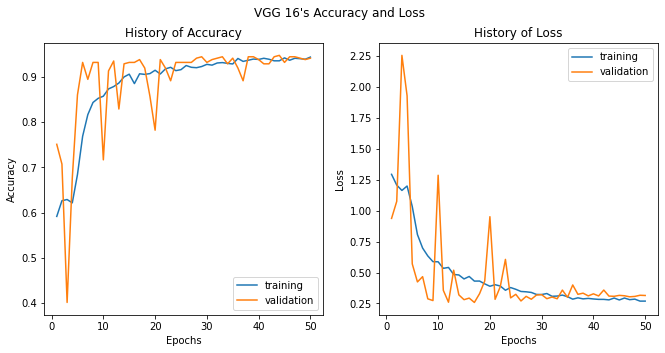

In [ ]:
import matplotlib.pyplot as plt
def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (11,5))
    fig.suptitle("VGG 16's Accuracy and Loss ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    plt.show()
    

Train_Val_Plot(history16.history['accuracy'],history16.history['val_accuracy'],
               history16.history['loss'],history16.history['val_loss'],
               )

# Test

**Test Example**

In [ ]:
#randomly choose a image from test group
import random
import os

path = '/content/drive/MyDrive/lung_cancer_dataset/test/malignant'
random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
file_path = '/content/drive/MyDrive/lung_cancer_dataset/test/malignant/'+random_filename
print(random_filename)
print(file_path)

Malignant case (490).jpg
/content/drive/MyDrive/lung_cancer_dataset/test/malignant/Malignant case (490).jpg


In [ ]:
import cv2
img=cv2.imread (file_path)
img=img/255
print(img.shape)
img=cv2.resize(img, (224,224))
print(img.shape)
img=np.expand_dims(img, axis=0)
print(img.shape)

(512, 512, 3)
(224, 224, 3)
(1, 224, 224, 3)


In [ ]:
#cite:https://pythonprogramming.net/using-trained-model-deep-learning-python-tensorflow-keras/
model = tf.keras.models.load_model("VGG16_new.h5",custom_objects={"f1_score": 1 })
prediction = model.predict(img)
print(prediction)

[[0.05966134 0.9159393  0.02439939]]


# Chatbot & GUI

In [ ]:
import io
import os
import cv2
import PySimpleGUI as sg
import nltk
from nltk.chat.util import Chat, reflections
from PIL import Image
#cite:https://opensource.com/article/18/8/pysimplegui
#cite:https://www.youtube.com/watch?v=-_z2RPAH0Qk

def reflections(input):
    if input == "Direction":
      return "Use Browse button to choose your image, and view it by Load button."
    elif input == "Suggestion":
      return "Result may not be accurate, if you feel sick please visit a doctor."

file_types = [("JPEG (*.jpg)", "*.jpg"),
              ("All files (*.*)", "*.*")]

def main():
    image_column = [
        [
            sg.Text("Image File(in jpg format)"),
            sg.Input(size=(25, 1), key="-FILE-"),
            sg.FileBrowse(file_types=file_types),
            sg.Button("Load Image"),
            sg.Button("Result")
        ],
        [sg.Text("Chance for Begin Malignant Normal")],
        [sg.Text("",key='-RE-')],
        [sg.Image(key="-IMAGE-")],
    ]

    chat_column = [
        [sg.Text("Ask Question!")],
        [sg.Text("Ex: Direction, Suggestion")],
        [
            sg.Input(size=(25, 1), key="-INPUT-"),
            sg.Button("Send")],
        [sg.Text("",key="-OUTPUT-")]
    ]

    layout = [
        [
            sg.Column(chat_column),
            sg.VSeperator(),
            sg.Column(image_column)
        ]
    ]

    window = sg.Window("Lung Cancer Diagnosis Application", layout)

    while True:
        event, values = window.read()
        if event == "Exit" or event == sg.WIN_CLOSED:
            break
        if event == "Load Image":
            filename = values["-FILE-"]
            if os.path.exists(filename):
                image = Image.open(values["-FILE-"])
                image.thumbnail((400, 400))
                bio = io.BytesIO()
                image.save(bio, format="PNG")
                window["-IMAGE-"].update(data=bio.getvalue())
        if event == "Result":
            image = cv2.imread(values["-FILE-"])
            image = image/255
            image = cv2.resize(image, (224,224))
            image=np.expand_dims(image, axis=0)
            model = tf.keras.models.load_model("VGG16_new.h5",custom_objects={"f1_score": 1 })
            prediction = model.predict(image)
            list = ' '.join([str(elem) for elem in prediction])
            window['-RE-'].update(value=list)
        if event == "Send":
            input_text = values['-INPUT-']
            output_text = reflections(input_text)
            window['-OUTPUT-'].update(output_text)
    window.close()

if __name__ == "__main__":
    main()